# <font color='green'> Mitali Bharali - UT Dallas




In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data= pd.read_excel('DS_Intern_Assignment.xlsx')

In [270]:
data.head()

,Start Date,End Date,Employer ID,Employer City,Employer State,Number of Slots,Price Paid,Marketplace Value Delivered,Applications,Renewed?
0,2017-03-14,2017-03-31,29586,na,na,35,1432.0000,3647.67274,204.1,0
1,2017-03-07,2017-03-31,56308,Portland,Oregon,35,2685.0000,4393.63018,343.7,0
2,2017-02-03,2017-02-10,29676,Springfield,Massachusetts,25,255.9700,1626.04316,55.9,1
3,2017-01-10,2017-01-11,7740,Tenafly,New Jersey,50,205.4025,145.61650,7.0,1
4,2017-01-05,2017-02-04,12693,Kingston,Ontario,50,3728.5700,6214.04228,904.5,1


In [26]:
data.isna().sum()

Start Date                     0
End Date                       0
Employer ID                    0
Employer City                  0
Employer State                 0
Number of Slots                0
Price Paid                     0
Marketplace Value Delivered    0
Applications                   0
Renewed?                       0
dtype: int64

In [27]:
data.dtypes

Start Date                     datetime64[ns]
End Date                       datetime64[ns]
Employer ID                             int64
Employer City                          object
Employer State                         object
Number of Slots                         int64
Price Paid                            float64
Marketplace Value Delivered           float64
Applications                          float64
Renewed?                                int64
dtype: object

In [271]:
data['Employer City'] = data['Employer City'].astype(str)

In [88]:
data.dtypes

Start Date                     datetime64[ns]
End Date                       datetime64[ns]
Employer ID                             int64
Employer City                          object
Employer State                         object
Number of Slots                         int64
Price Paid                            float64
Marketplace Value Delivered           float64
Applications                          float64
Renewed?                                int64
Start Year                              int64
End Year                                int64
Start Month                             int64
End Month                               int64
dtype: object

In [3]:
data['term-length'] = data['End Date'] - data['Start Date']

In [4]:
data.head()

,Start Date,End Date,Employer ID,Employer City,Employer State,Number of Slots,Price Paid,Marketplace Value Delivered,Applications,Renewed?,term-length
0,2017-03-14,2017-03-31,29586,na,na,35,1432.0000,3647.67274,204.1,0,17 days
1,2017-03-07,2017-03-31,56308,Portland,Oregon,35,2685.0000,4393.63018,343.7,0,24 days
2,2017-02-03,2017-02-10,29676,Springfield,Massachusetts,25,255.9700,1626.04316,55.9,1,7 days
3,2017-01-10,2017-01-11,7740,Tenafly,New Jersey,50,205.4025,145.61650,7.0,1,1 days
4,2017-01-05,2017-02-04,12693,Kingston,Ontario,50,3728.5700,6214.04228,904.5,1,30 days


# ADD LAT LONG

In [4]:
data['Start Year'] = pd.DatetimeIndex(data['Start Date']).year

In [5]:
data['End Year'] = pd.DatetimeIndex(data['End Date']).year

In [6]:
data['Start Month'] = pd.DatetimeIndex(data['Start Date']).month

In [7]:
data['End Month'] = pd.DatetimeIndex(data['End Date']).month

In [8]:
data.head()

,Start Date,End Date,Employer ID,Employer City,Employer State,Number of Slots,Price Paid,Marketplace Value Delivered,Applications,Renewed?,term-length,Start Year,End Year,Start Month,End Month
0,2017-03-14,2017-03-31,29586,na,na,35,1432.0000,3647.67274,204.1,0,17 days,2017,2017,3,3
1,2017-03-07,2017-03-31,56308,Portland,Oregon,35,2685.0000,4393.63018,343.7,0,24 days,2017,2017,3,3
2,2017-02-03,2017-02-10,29676,Springfield,Massachusetts,25,255.9700,1626.04316,55.9,1,7 days,2017,2017,2,2
3,2017-01-10,2017-01-11,7740,Tenafly,New Jersey,50,205.4025,145.61650,7.0,1,1 days,2017,2017,1,1
4,2017-01-05,2017-02-04,12693,Kingston,Ontario,50,3728.5700,6214.04228,904.5,1,30 days,2017,2017,1,2


In [11]:
data.to_excel("outputdata1.xlsx")

In [52]:
df= pd.read_excel('outputdata1.xlsx')

In [53]:
df.shape

(3078, 15)

In [42]:
df.dtypes

Start Date                     datetime64[ns]
End Date                       datetime64[ns]
Employer ID                             int64
Employer City                          object
Employer State                         object
Number of Slots                         int64
Price Paid                            float64
Marketplace Value Delivered           float64
Applications                          float64
Renewed?                                int64
term-length                             int64
Start Year                              int64
End Year                                int64
Start Month                             int64
End Month                               int64
dtype: object

In [56]:
df.drop(df.loc[df['Employer City']==0].index, inplace=True)

In [57]:
df.shape

(3068, 15)

CHECK DUPLICATES FOR EMPLOYER ID


In [43]:
dup = df.duplicated(subset=None, keep='first')

In [12]:
dup.sum()

0

In [58]:
city_encode=pd.get_dummies(df['Employer City'],columns='Employer City',prefix='city')

In [59]:
data=pd.concat([df, city_encode], axis=1)

In [60]:
data.shape

(3068, 891)

In [20]:
data.drop(['Start Year', 'End Year', 'Start Month', 'End Month'], axis = 1)

,Start Date,End Date,Employer ID,Employer City,Employer State,Number of Slots,Price Paid,Marketplace Value Delivered,Applications,Renewed?,...,city_Woonsocket,city_Worcester,city_Wyandotte,city_Wyoming,city_Yavne,city_Yonkers,city_Yucaipa,city_Zebulon,city_Zeist,city_na
0,2017-03-14,2017-03-31,29586,na,na,35,1432.0000,3647.672740,204.1,0,...,0,0,0,0,0,0,0,0,0,1
1,2017-03-07,2017-03-31,56308,Portland,Oregon,35,2685.0000,4393.630180,343.7,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-02-03,2017-02-10,29676,Springfield,Massachusetts,25,255.9700,1626.043160,55.9,1,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-10,2017-01-11,7740,Tenafly,New Jersey,50,205.4025,145.616500,7.0,1,...,0,0,0,0,0,0,0,0,0,0
4,2017-01-05,2017-02-04,12693,Kingston,Ontario,50,3728.5700,6214.042280,904.5,1,...,0,0,0,0,0,0,0,0,0,0
5,2016-12-01,2016-12-31,49482,Toronto,Ontario,10,1491.0700,109.920320,6.2,0,...,0,0,0,0,0,0,0,0,0,0
6,2016-11-27,2016-12-29,49246,na,na,10,22912.0000,488.433720,26.6,0,...,0,0,0,0,0,0,0,0,0,1
7,2016-11-18,2016-12-31,107337,Penticton,British Columbia,50,4533.6941,3394.845980,211.0,1,...,0,0,0,0,0,0,0,0,0,0
8,2016-11-16,2017-02-28,48324,Greenwood Village,Colorado,10,10024.0000,33.243880,2.2,0,...,0,0,0,0,0,0,0,0,0,0
9,2016-11-10,2017-02-25,108098,0,0,25,28640.0000,4875.634225,917.1,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
g.head()

Price Paid term-length
Employer ID Employer City Employer State                        
40          Belmont       California         67125.0    393 days
43          Northbrook    Illinois           85025.0    365 days
72          New York      New York State     71600.0    365 days
            na            na                 19690.0    365 days
94          Houston       Texas              21480.0    365 days

# DATA VISUALIZATION

# MODELLING

In [101]:
#X = data[['Number of Slots', 'Price Paid', 'Marketplace Value Delivered', 'Applications', 'Start Year', 'End Year', 'Start Month', 'End Month']]
#y = data[['Renewed?']]

In [61]:
y= data['Renewed?']

In [62]:
X = data.drop(['Renewed?', 'Employer ID', 'Employer State', 'Employer City', 'Start Date', 'End Date'], axis=1)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org , y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [64]:
from sklearn.decomposition import PCA

#create model
pca = PCA(n_components= 0.95, random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#base model
logreg = LogisticRegression()

#grid params
grid_param = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
             'penalty':['l1', 'l2']}

#grid search model
log_grid= GridSearchCV(logreg, grid_param, cv = 3, n_jobs= -1, return_train_score = True)

#train grid search model
log_grid.fit(X_train_reduced, y_train)



#find the best params
print('Best param:', log_grid.best_params_)
print('Best score:', log_grid.best_score_)

Best param: {'C': 1, 'penalty': 'l1'}
Best score: 0.6996957844415471


In [67]:
logreg = LogisticRegression(C=1, penalty = 'l1').fit(X_train_reduced, y_train)
pred_logreg = logreg.predict(X_test_reduced)
print("logreg score: {:.2f}".format(logreg.score(X_test_reduced, y_test)))


from sklearn.metrics import confusion_matrix
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))



from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg, target_names=["0", "1"]))

logreg score: 0.73

Logistic Regression
[[ 40 181]
 [ 25 521]]
             precision    recall  f1-score   support

          0       0.62      0.18      0.28       221
          1       0.74      0.95      0.83       546

avg / total       0.71      0.73      0.67       767



In [ ]:
#find the best params
print('Best param:', bag_grid.best_params_)
print('Best score:', bag_grid.best_score_)

In [ ]:
bag_clf_log = BaggingClassifier(LogisticRegression(C= 0.1, penalty= 'l1'), n_estimators=200, max_samples=250, bootstrap=True, random_state=0)

bag_clf_log.fit(X_train, y_train)

In [ ]:
#y_pred = bag_clf_log.predict(X_test)
print('Bagging Train score: {:.2f}'.format(bag_clf_log.score(X_train, y_train)))
print('Bagging Test score: {:.2f}'.format(bag_clf_log.score(X_test, y_test)))

pasting

In [ ]:
bag_clf_log_p = BaggingClassifier(LogisticRegression(C= 0.1, penalty= 'l1'), n_estimators=200, max_samples=250, bootstrap=False, random_state=0)

bag_clf_log_p.fit(X_train, y_train)

In [ ]:
bag_clf_log_p = BaggingClassifier(LogisticRegression(C= 0.1, penalty= 'l1'), n_estimators=200, max_samples=250, bootstrap=False, random_state=0)

bag_clf_log_p.fit(X_train, y_train)

In [ ]:
print('Pasting Train score: {:.2f}'.format(bag_clf_log_p.score(X_train, y_train)))
print('Pasting Test score: {:.2f}'.format(bag_clf_log_p.score(X_test, y_test)))

# SVC 
kernels:

- rbf


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#base model
svc = SVC(probability = True, random_state = 0, kernel = 'rbf')

#grid params
grid_param = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}

#grid search model
svc_grid_l= GridSearchCV(svc, grid_param, cv = 5, n_jobs= -1, return_train_score = True)

#train grid search model
svc_grid_l.fit(X_train_reduced, y_train)

#find the best params
print('Best param:', svc_grid_l.best_params_)
print('Best score:', svc_grid_l.best_score_)

In [51]:
svc_l = SVC(kernel = 'linear', C = 100, gamma = 1).fit(X_train, y_train)
pred_svc_l = svc_l.predict(X_test)
print("svc rbf test score: {:.2f}".format(svc_l.score(X_test, y_test)))
print("svc rbf train score: {:.2f}".format(svc_l.score(X_train, y_train)))


print("\nSVC-linear")
print(confusion_matrix(y_test, pred_svc_l))


from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svc_l, target_names=["0", "1"]))

svc rbf test score: 0.67
svc rbf train score: 0.70

SVC-linear
[[ 40 194   3   0]
 [  6 370  25   1]
 [  0   0  47   0]
 [  0   0   1   3]]
             precision    recall  f1-score   support

          0       0.87      0.17      0.28       237
          1       0.66      0.92      0.77       402

avg / total       0.73      0.67      0.60       690



C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 4, does not match size of target_names, 2
  .format(len(labels), len(target_names))


DECISION TREE CLASSIFIER

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6]}
dtree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, return_train_score = True)
dtree_grid.fit(X_train_reduced, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [23]:
print("best parameters are:",dtree_grid.best_params_)
print('Best score:', dtree_grid.best_score_)

best parameters are: {'max_depth': 3}
Best score: 0.712738301559792


In [24]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3).fit(X_train_reduced, y_train)
pred_tree = tree.predict(X_test_reduced)
print("Test score: {:.2f}".format(tree.score(X_test_reduced, y_test)))

from sklearn.metrics import confusion_matrix
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree, target_names=["0", "1"]))

Test score: 0.68

Decision tree:
[[ 36 227]
 [ 22 485]]
             precision    recall  f1-score   support

          0       0.62      0.14      0.22       263
          1       0.68      0.96      0.80       507

avg / total       0.66      0.68      0.60       770



### for the best base model, we apply Ensemble Learning  -

So we apply ensemble learning methods to the best model for better model performance:
- Bagging and Pasting
- Boosting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression



log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)#do for each of the models
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)#soft voting
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

print('SOFT VOTING')
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

print('HARD VOTING')

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

### BAGGING

In [ ]:
from sklearn.ensemble import BaggingClassifier

#grid params
grid_param = {'n_estimators':[100, 200, 300, 400, 500, 600, 700], 
             'max_samples':[50, 100, 150, 200, 250, 300]}

#grid search model
bag_grid= GridSearchCV(BaggingClassifier(tree), grid_param, cv = 5)
#train grid search model
bag_grid.fit(X_train, y_train)

### BOOSTING
- Adaboost
- Gradient Boosting

### Adaboosting

we know the best parameter for 

In [36]:
dt= DecisionTreeClassifier(max_depth=6)

In [37]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.svm import SVR

#from sklearn.linear_model import LogisticRegression
#base model


#grid params
grid_param = {'n_estimators':[100, 200, 300, 400, 500, 600, 700], 
             'learning_rate':[0.25, 0.5, 0.75, 1, 1.25, 1.5, 2]}

#grid search model
ada_grid_dt= GridSearchCV(AdaBoostClassifier(dt), grid_param, cv = 5)
#train grid search model
ada_grid_dt.fit(X_train, y_train)

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700], 'learning_rate': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
print('Best param:', ada_grid_dt.best_params_)
print('Best score:', ada_grid_dt.best_score_)

Best param: {'learning_rate': 0.25, 'n_estimators': 100}
Best score: 0.7049393414211439


In [39]:
from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, algorithm="SAMME.R", learning_rate=0.25, random_state=0)
ada_clf.fit(X_train, y_train)

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.25, n_estimators=100, random_state=0)

In [40]:
print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.673


In [41]:

pred_ada = ada_clf.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
print("\nAdaboost Decision Tree:")
print(confusion_matrix(y_test, pred_tree))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree, target_names=["0", "1"]))

Test score: 0.67

Adaboost Decision Tree:
[[ 21 242]
 [ 11 496]]
             precision    recall  f1-score   support

          0       0.66      0.08      0.14       263
          1       0.67      0.98      0.80       507

avg / total       0.67      0.67      0.57       770



## Gradient Boosting:

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt_dt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt_dt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt_dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt_dt.score(X_test, y_test)))

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on training set: 0.745
Accuracy on test set: 0.684


In [43]:
pred_gb = gbrt_dt.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
print("\nGradient Boosting on Decision Tree:")
print(confusion_matrix(y_test, pred_tree))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree, target_names=["0", "1"]))

Test score: 0.67

Gradient Boosting on Decision Tree:
[[ 21 242]
 [ 11 496]]
             precision    recall  f1-score   support

          0       0.66      0.08      0.14       263
          1       0.67      0.98      0.80       507

avg / total       0.67      0.67      0.57       770



# ROC CURVE

In [25]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train_reduced, y_train) 

y_pred_rf = rnd_clf.predict(X_test_reduced)

### Feature Selection

In [26]:
forest = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
forest.fit(X_train_reduced, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test_reduced, y_test)))

Accuracy on training set: 0.734
Accuracy on test set: 0.684


In [27]:


pred_rf = forest.predict(X_test_reduced)
print("Test score: {:.2f}".format(tree.score(X_test_reduced, y_test)))

from sklearn.metrics import confusion_matrix
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf, target_names=["0", "1"]))

Test score: 0.68

Decision tree:
[[ 36 227]
 [ 22 485]]
             precision    recall  f1-score   support

          0       0.76      0.11      0.19       263
          1       0.68      0.98      0.80       507

avg / total       0.71      0.68      0.60       770



In [384]:
#sns.barplot(x=feature_imp.head(10), y=feature_imp.head(10).index)
# Add labels to your graph



In [26]:
y_list

array([0.14666281, 0.23379945, 0.26091191, 0.35862584])

In [25]:
X.columns

Index(['Number of Slots', 'Price Paid', 'Marketplace Value Delivered',
       'Applications'],
      dtype='object')

In [30]:
fi=forest.feature_importances_

In [38]:
X_train_reduced.shape

(2308, 599)

In [36]:
fi = pd.Series(fi)

In [37]:
fi.head(10)

0    0.001556
1    0.002841
2    0.004796
3    0.017558
4    0.003086
5    0.017428
6    0.021448
7    0.024787
8    0.009040
9    0.011486
dtype: float64

In [ ]:
feature_imp = pd.Series(forest.feature_importances_, index = .columns).sort_values(ascending=False)
#print(feature_imp)

sns.barplot(x=feature_imp.head(10), y=feature_imp.head(10).index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

plt.show()

<IPython.core.display.Javascript object>


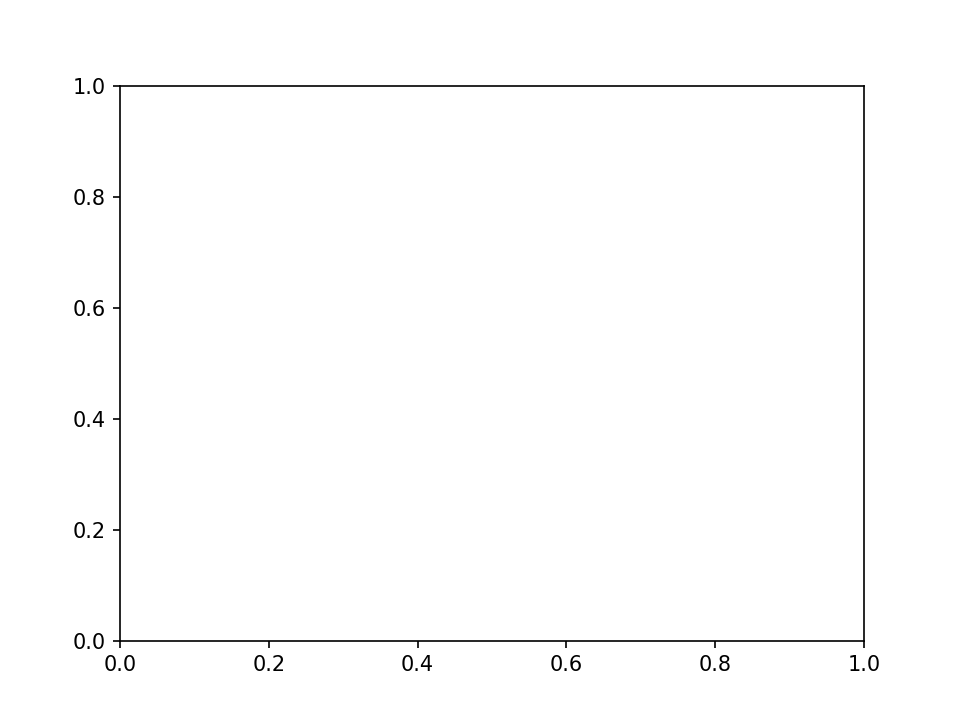

TypeError: only size-1 arrays can be converted to Python scalars

In [34]:
%matplotlib notebook

y_list = pd.DataFrame(fi)
y_pos = np.arange(len(y_list))
features = X.columns
plt.barh(y_pos, y_list.head(10), align='center', alpha=0.7)
plt.yticks(y_pos, features)